In [28]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [29]:
main_dish = pd.read_csv('main_dish.csv')
side_dish = pd.read_csv('side_dish.csv')
kimchi = pd.read_csv('removed_kimchi.csv')
rice = pd.read_csv('removed_rice.csv')
soup = pd.read_csv('removed_soup.csv')

In [30]:
main_dish.head()
# side_dish.head()
# kimchi.head()
# rice.head()
# soup.head()

,RecipeID,Name,식품대분류,식품상세분류,1회제공량(g),calories,carbohydrate,protein,fat,sugar,sodium
0,1,오징어순대,찜류,어패류찜,350,466.86,58.3,45.7,5.6,0.4,1258.71
1,2,대구찜,찜류,어패류찜,500,376.42,24.7,51.7,7.9,5.7,1898.67
2,3,동태찜,찜류,어패류찜,500,394.32,25.8,50.9,9.7,5.7,1985.60
3,4,돼지등갈비찜,찜류,육류찜,450,961.04,57.4,72.1,49.2,24.1,2395.17
4,5,돼지머리고기,찜류,육류찜,200,650.00,3.5,42.4,52.0,0.1,333.64


In [31]:
main_dish.info()
# side_dish.info()
# kimchi.info()
# rice.info()
# soup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RecipeID      202 non-null    int64  
 1   Name          202 non-null    object 
 2   식품대분류         202 non-null    object 
 3   식품상세분류        202 non-null    object 
 4   1회제공량(g)      202 non-null    int64  
 5   calories      202 non-null    float64
 6   carbohydrate  202 non-null    float64
 7   protein       202 non-null    float64
 8   fat           202 non-null    float64
 9   sugar         202 non-null    float64
 10  sodium        202 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 17.5+ KB


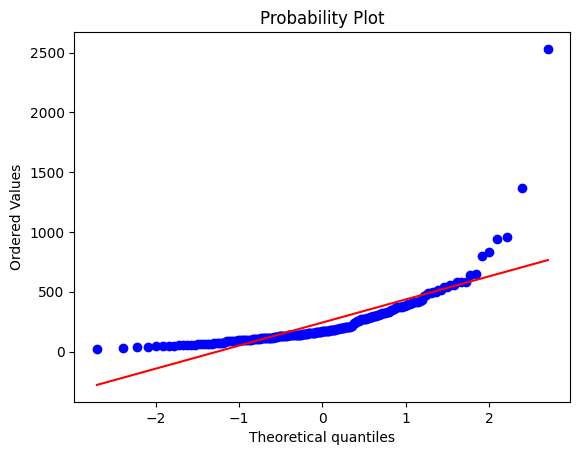

In [32]:
import pylab 
import scipy.stats as stats
stats.probplot(main_dish.calories.to_numpy(), dist="norm", plot=pylab)
pylab.show()

In [33]:
main_dish_dataset=main_dish.copy()
side_dish_dataset=side_dish.copy()
kimchi_dataset=kimchi.copy()
rice_dataset=rice.copy()
soup_dataset=soup.copy()
columns=['RecipeID','Name','calories','carbohydrate','protein','fat','sugar','sodium']
main_dish_dataset=main_dish_dataset[columns]
side_dish_dataset=side_dish_dataset[columns]
kimchi_dataset=kimchi_dataset[columns]
rice_dataset=rice_dataset[columns]
soup_dataset=soup_dataset[columns]

In [34]:
random_meal = []
for i in range(0, 100):
    list = []
    main_random_num = random.randint(1, len(main_dish_dataset.index))
    side_random_num = random.randint(1, len(side_dish_dataset.index))
    rice_random_num = random.randint(1, len(rice_dataset.index))
    kimchi_random_num = random.randint(1, len(kimchi_dataset.index))
    soup_random_num = random.randint(1, len(soup_dataset.index))
    list = [main_random_num, side_random_num, rice_random_num, kimchi_random_num, soup_random_num]
    random_meal.append(list)
print(random_meal)
print(len(random_meal))



[[165, 108, 48, 22, 63], [25, 79, 34, 23, 132], [26, 19, 14, 5, 33], [102, 133, 16, 21, 83], [35, 94, 54, 3, 56], [186, 151, 48, 17, 63], [113, 127, 33, 6, 161], [135, 135, 50, 15, 22], [196, 13, 14, 4, 57], [73, 77, 43, 17, 35], [107, 9, 45, 16, 135], [77, 146, 55, 5, 33], [99, 65, 43, 9, 26], [109, 59, 20, 10, 40], [70, 54, 45, 16, 72], [90, 12, 31, 26, 74], [35, 113, 19, 1, 16], [146, 102, 23, 9, 103], [115, 41, 2, 4, 69], [56, 56, 3, 6, 128], [159, 16, 47, 2, 85], [99, 119, 36, 21, 105], [119, 131, 26, 6, 145], [118, 22, 40, 1, 169], [40, 148, 34, 24, 18], [2, 18, 6, 10, 43], [167, 7, 8, 18, 85], [87, 78, 31, 9, 67], [177, 12, 10, 9, 159], [78, 122, 4, 26, 40], [87, 54, 39, 8, 61], [177, 15, 52, 11, 71], [188, 33, 45, 15, 60], [81, 26, 53, 22, 58], [199, 146, 4, 11, 78], [6, 145, 51, 14, 144], [36, 87, 35, 24, 119], [122, 58, 46, 2, 125], [189, 21, 26, 25, 2], [33, 4, 42, 14, 149], [199, 3, 6, 8, 144], [129, 133, 43, 19, 186], [167, 108, 52, 3, 184], [9, 68, 46, 22, 21], [199, 72, 

In [35]:
random_meal_cal = [];random_meal_car = []
random_meal_pro= [];random_meal_fat = []
random_meal_sug = [];random_meal_sod = []
data_set_list = [main_dish_dataset, side_dish_dataset, rice_dataset, kimchi_dataset, soup_dataset]
for i in range(len(random_meal)):
        meal_cal, meal_car, meal_pro, meal_fat, meal_sug, meal_sod = 0, 0, 0, 0, 0, 0
        for j in range(5):
                recipe_id = random_meal[i][j]
                row = data_set_list[j][data_set_list[j]['RecipeID'] == recipe_id]
                if not row.empty:
                        row = row.iloc[0]
                        cal = row['calories'];car = row['carbohydrate']
                        pro = row['protein'];fat = row['fat']
                        sug = row['sugar'];sod = row['sodium']   

                        meal_cal += cal;meal_car += car
                        meal_pro += pro;meal_fat += fat
                        meal_sug += sug;meal_sod += sod

        random_meal_cal.append(meal_cal);random_meal_car.append(meal_car)
        random_meal_pro.append(meal_pro);random_meal_fat.append(meal_fat)
        random_meal_sug.append(meal_sug);random_meal_sod.append(meal_sod)

print(recipe_id)
print(row)
print(random_meal_cal)
print(len(random_meal_cal))


72
RecipeID            72
Name             배추된장국
calories         79.08
carbohydrate     10.33
protein           5.85
fat                1.6
sugar              0.0
sodium          890.79
Name: 71, dtype: object
[1023.0, 672.54, 1326.13, 1159.09, 1104.9599999999998, 1191.6299999999999, 977.83, 1527.43, 1373.22, 1587.89, 667.9699999999999, 1451.8200000000002, 1608.0800000000002, 933.2, 807.6899999999999, 998.05, 1357.08, 1028.03, 390.1, 950.8199999999999, 725.89, 1336.9199999999998, 1109.1, 1215.17, 1099.17, 1698.4100000000003, 1621.0900000000001, 1107.4399999999998, 1085.45, 1163.0299999999997, 947.25, 748.9899999999999, 681.57, 895.5999999999999, 1374.1299999999997, 1297.74, 803.1699999999998, 697.8, 1281.67, 1157.2, 921.28, 1366.1899999999998, 1267.6699999999998, 1334.09, 643.39, 1180.85, 1235.1699999999998, 1208.77, 976.1899999999999, 1633.81, 1127.5400000000002, 977.3, 619.77, 1210.12, 1059.09, 860.6999999999999, 1052.6, 1021.84, 895.6700000000001, 981.6800000000001, 904.5, 1001.300

In [36]:
print(random_meal)

[[165, 108, 48, 22, 63], [25, 79, 34, 23, 132], [26, 19, 14, 5, 33], [102, 133, 16, 21, 83], [35, 94, 54, 3, 56], [186, 151, 48, 17, 63], [113, 127, 33, 6, 161], [135, 135, 50, 15, 22], [196, 13, 14, 4, 57], [73, 77, 43, 17, 35], [107, 9, 45, 16, 135], [77, 146, 55, 5, 33], [99, 65, 43, 9, 26], [109, 59, 20, 10, 40], [70, 54, 45, 16, 72], [90, 12, 31, 26, 74], [35, 113, 19, 1, 16], [146, 102, 23, 9, 103], [115, 41, 2, 4, 69], [56, 56, 3, 6, 128], [159, 16, 47, 2, 85], [99, 119, 36, 21, 105], [119, 131, 26, 6, 145], [118, 22, 40, 1, 169], [40, 148, 34, 24, 18], [2, 18, 6, 10, 43], [167, 7, 8, 18, 85], [87, 78, 31, 9, 67], [177, 12, 10, 9, 159], [78, 122, 4, 26, 40], [87, 54, 39, 8, 61], [177, 15, 52, 11, 71], [188, 33, 45, 15, 60], [81, 26, 53, 22, 58], [199, 146, 4, 11, 78], [6, 145, 51, 14, 144], [36, 87, 35, 24, 119], [122, 58, 46, 2, 125], [189, 21, 26, 25, 2], [33, 4, 42, 14, 149], [199, 3, 6, 8, 144], [129, 133, 43, 19, 186], [167, 108, 52, 3, 184], [9, 68, 46, 22, 21], [199, 72, 

In [37]:
max_daily_Calories=2700
max_daily_Carbohydrate=325
max_daily_Protein=200
max_daily_fat=100
max_daily_Sugar=40
max_daily_Sodium=3000
max_list=[max_daily_Calories, max_daily_Carbohydrate, max_daily_Protein, max_daily_fat, max_daily_Sugar, max_daily_Sodium]

max_one_meal_Calories=1500
max_one_meal_Carbohydrate=200
max_one_meal_Protein=150
max_one_meal_fat=60
max_one_meal_Sugar=30
max_one_meal_Sodium=2000
max_one_meal_list=[max_one_meal_Calories, max_one_meal_Carbohydrate, max_one_meal_Protein, max_one_meal_fat, max_one_meal_Sugar, max_one_meal_Sodium]

In [38]:
filtered_random_meal = random_meal.copy()
random_meal_nut = [random_meal_cal, random_meal_car, random_meal_pro, random_meal_fat, random_meal_sug, random_meal_sod]
for i in range(100):
    for j in range(6):
        if random_meal_nut[j][i] > max_one_meal_list[j]:
            filtered_random_meal[i] = 0
print(filtered_random_meal)
filtered_random_meal = [i for i in filtered_random_meal if i != 0]
print(filtered_random_meal)
print(len(filtered_random_meal))

[0, [25, 79, 34, 23, 132], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, [9, 68, 46, 22, 21], 0, 0, 0, 0, 0, 0, 0, 0, [178, 41, 21, 17, 73], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, [75, 66, 29, 14, 164], 0, 0, 0, 0, 0]
[[25, 79, 34, 23, 132], [9, 68, 46, 22, 21], [178, 41, 21, 17, 73], [75, 66, 29, 14, 164]]
4


In [39]:
filtered_meal_cal = [];filtered_meal_car = []
filtered_meal_pro= [];filtered_meal_fat = []
filtered_meal_sug = [];filtered_meal_sod = []
for i in range(len(filtered_random_meal)):
        meal_cal, meal_car, meal_pro, meal_fat, meal_sug, meal_sod = 0, 0, 0, 0, 0, 0
        for j in range(5):
                recipe_id = random_meal[i][j]
                row = data_set_list[j][data_set_list[j]['RecipeID'] == recipe_id]
                if not row.empty:
                        row = row.iloc[0]
                        cal = row['calories'];car = row['carbohydrate']
                        pro = row['protein'];fat = row['fat']
                        sug = row['sugar'];sod = row['sodium']   

                        meal_cal += cal;meal_car += car
                        meal_pro += pro;meal_fat += fat
                        meal_sug += sug;meal_sod += sod

        filtered_meal_cal.append(meal_cal);filtered_meal_car.append(meal_car)
        filtered_meal_pro.append(meal_pro);filtered_meal_fat.append(meal_fat)
        filtered_meal_sug.append(meal_sug);filtered_meal_sod.append(meal_sod)
filtered_meal_list = [filtered_meal_cal, filtered_meal_car, filtered_meal_pro, filtered_meal_fat, filtered_meal_sug, filtered_meal_sod]
print(filtered_meal_cal)
print(len(filtered_meal_cal))
print(len(filtered_meal_sod))

[1023.0, 672.54, 1326.13, 1159.09]
4
4


In [40]:
final_meal_csv = pd.DataFrame(filtered_meal_cal, columns = ["calories"])
print(final_meal_csv)

   calories
0   1023.00
1    672.54
2   1326.13
3   1159.09


In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
final_data = scaler.fit_transform()

TypeError: float() argument must be a string or a real number, not 'generator'